In [ ]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
from datetime import datetime


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# skimage.filters.thresholding.threshold_isodata
# skimage.filters.thresholding.threshold_li
# skimage.filters.thresholding.threshold_mean
# skimage.filters.thresholding.threshold_minimum
# skimage.filters.thresholding.threshold_otsu     <------------------------
# skimage.filters.thresholding.threshold_triangle
# skimage.filters.thresholding.threshold_yen
# skimage.filters.thresholding.threshold_local    <------------------------
####################################################local
# filters.threshold_local(
#     image,
#     block_size,
#     method='gaussian',
#     offset=0,
#     mode='reflect',
#     param=None,
#     cval=0,
# )
# from skimage import filters
# local_thresh = filters.threshold_local(image = X_train[0].reshape(28, 28), 
#                                        block_size = 5, 
#                                        offset = 1 )
# print(local_thresh.shape)
# binary = X_train[0].reshape(28, 28) > local_thresh
# plt.imshow(binary, cmap='gray')
# plt.show()
#####################################################global
# from skimage.filters import threshold_otsu
# otsu_value = threshold_otsu(andy)
# print(otsu_value)
# otus_andy = andy > otsu_value
# plt.imshow(otus_andy, cmap='gray')
# plt.show()

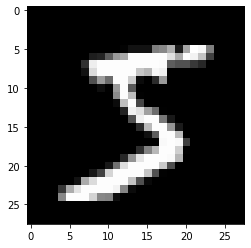

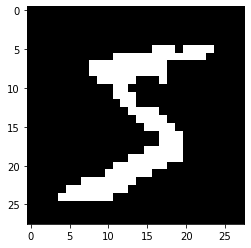

In [ ]:
# 參考 單筆數據 進行 thresholding 處理
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.show()
binary = X_train[0].reshape(28, 28) > (100) # <---------可以參考以上可能方式讓模型更精準
plt.imshow(binary, cmap='gray')
plt.show()

In [ ]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255.0
x_Test_norm = X_test_2D/255.0

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=800, verbose=1)  

Epoch 1/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0620 - accuracy: 0.9832 - val_loss: 0.1047 - val_accuracy: 0.9697
Epoch 2/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0589 - accuracy: 0.9840 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 3/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0550 - accuracy: 0.9856 - val_loss: 0.1018 - val_accuracy: 0.9702
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0523 - accuracy: 0.9861 - val_loss: 0.1018 - val_accuracy: 0.9690
Epoch 5/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0490 - accuracy: 0.9874 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 6/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0463 - accuracy: 0.9885 - val_loss: 0.0974 - val_accuracy: 0.9712
Epoch 7/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0438 - accuracy: 0.9892 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 8/10
60

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.1398 - accuracy: 0.9596

	[Info] Accuracy of testing data = 96.0%


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9645

	[Info] Accuracy of training data = 96.4%


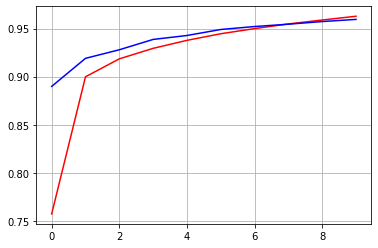

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

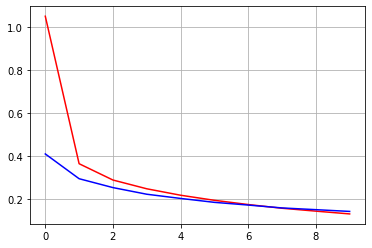

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()